# <center>Kiss Dániel Márk</center>
## <center>WP871Q</center>

# Library import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score

# Data import

In [2]:
df_verseny_public_train = pd.read_csv('data/verseny_public_train.csv', sep=',', low_memory=False)

# Data familirsation

In [3]:
df_verseny_public_train

,cookie_id,Topic1_ic,Topic1_ec,Topic2_ic,Topic2_ec,Topic3_ic,Topic3_ec,Topic4_ic,Topic4_ec,Topic5_ic,...,Topic177_ec,Topic178_ic,Topic178_ec,Topic179_ic,Topic179_ec,Topic180_ic,Topic180_ec,Topic181_ic,Topic181_ec,target
0,100000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,8,57,0,0,15,43,0,...,0,0,0,0,0,0,0,0,0,0
2,100002,0,0,0,0,8,50,8,50,0,...,0,0,0,0,0,0,0,0,0,0
3,100003,15,15,8,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100004,0,0,8,15,0,0,15,15,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,0,0,0,0,127,1,8,1,22,...,0,0,0,0,0,0,0,0,0,0
99996,199996,50,8,0,0,57,1,50,8,50,...,0,0,0,0,0,0,0,0,0,0
99997,199997,15,127,0,0,22,1,71,120,8,...,0,0,0,0,0,0,0,0,0,0
99998,199998,8,8,0,0,43,1,8,64,8,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_verseny_public_train.describe()

,cookie_id,Topic1_ic,Topic1_ec,Topic2_ic,Topic2_ec,Topic3_ic,Topic3_ec,Topic4_ic,Topic4_ec,Topic5_ic,...,Topic177_ec,Topic178_ic,Topic178_ec,Topic179_ic,Topic179_ec,Topic180_ic,Topic180_ec,Topic181_ic,Topic181_ec,target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.000000
mean,149999.500000,8.798000,16.085980,1.066320,7.923940,19.105870,8.563590,15.600520,23.712400,4.927330,...,0.002190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015000
std,28867.657797,23.308133,48.515646,5.824816,50.279646,42.710725,40.371399,31.981042,54.356458,17.719046,...,0.501804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121553
min,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,124999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,149999.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,174999.250000,8.000000,8.000000,0.000000,0.000000,22.000000,1.000000,15.000000,22.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,199999.000000,477.000000,1548.000000,610.000000,1576.000000,631.000000,1506.000000,603.000000,1632.000000,512.000000,...,134.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [5]:
df_verseny_public_train.columns

Index(['cookie_id', 'Topic1_ic', 'Topic1_ec', 'Topic2_ic', 'Topic2_ec',
       'Topic3_ic', 'Topic3_ec', 'Topic4_ic', 'Topic4_ec', 'Topic5_ic',
       ...
       'Topic177_ec', 'Topic178_ic', 'Topic178_ec', 'Topic179_ic',
       'Topic179_ec', 'Topic180_ic', 'Topic180_ec', 'Topic181_ic',
       'Topic181_ec', 'target'],
      dtype='object', length=258)

# Feature importance

## Decision Tree

Feature ranking:
1. Feature 59 (0.033418) Topic42_ec
2. Feature 17 (0.032193) Topic12_ec
3. Feature 68 (0.029951) Topic55_ic
4. Feature 82 (0.026595) Topic63_ic
5. Feature 66 (0.024349) Topic54_ic
6. Feature 21 (0.024163) Topic14_ec
7. Feature 7 (0.024021) Topic4_ec
8. Feature 83 (0.023980) Topic63_ec
9. Feature 6 (0.022955) Topic4_ic
10. Feature 61 (0.020084) Topic51_ec
11. Feature 16 (0.019476) Topic12_ic
12. Feature 71 (0.018981) Topic56_ec
13. Feature 70 (0.017888) Topic56_ic
14. Feature 63 (0.016802) Topic52_ec
15. Feature 29 (0.016643) Topic19_ec
16. Feature 69 (0.016138) Topic55_ec
17. Feature 18 (0.015552) Topic13_ic
18. Feature 14 (0.014938) Topic10_ic
19. Feature 11 (0.014276) Topic8_ec
20. Feature 28 (0.013293) Topic19_ic
21. Feature 67 (0.013161) Topic54_ec
22. Feature 175 (0.012607) Topic136_ec
23. Feature 20 (0.012280) Topic14_ic
24. Feature 12 (0.011809) Topic9_ic
25. Feature 135 (0.011496) Topic99_ec
26. Feature 22 (0.011323) Topic15_ic
27. Feature 3 (0.010762) Topic2_e

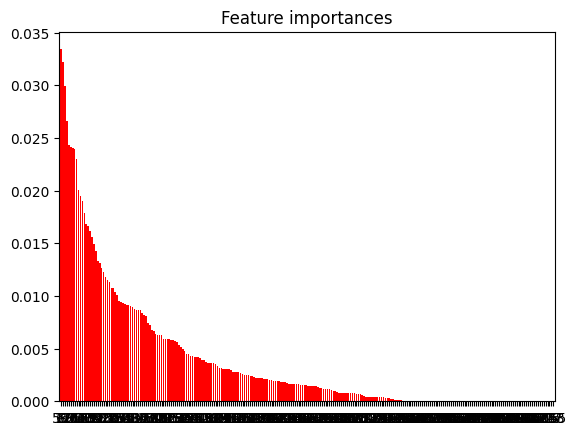

In [6]:
X = df_verseny_public_train.drop(['target', 'cookie_id'], axis=1)
y = df_verseny_public_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X.columns[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Random forest

Feature ranking:
1. Feature 7 (0.024542) Topic4_ec
2. Feature 68 (0.023729) Topic55_ic
3. Feature 17 (0.023030) Topic12_ec
4. Feature 82 (0.022734) Topic63_ic
5. Feature 19 (0.021398) Topic13_ec
6. Feature 21 (0.021159) Topic14_ec
7. Feature 6 (0.020983) Topic4_ic
8. Feature 18 (0.020802) Topic13_ic
9. Feature 16 (0.020704) Topic12_ic
10. Feature 83 (0.020632) Topic63_ec
11. Feature 59 (0.020310) Topic42_ec
12. Feature 71 (0.020155) Topic56_ec
13. Feature 20 (0.020151) Topic14_ic
14. Feature 70 (0.019016) Topic56_ic
15. Feature 4 (0.017831) Topic3_ic
16. Feature 66 (0.017322) Topic54_ic
17. Feature 69 (0.016049) Topic55_ec
18. Feature 61 (0.015968) Topic51_ec
19. Feature 67 (0.015803) Topic54_ec
20. Feature 28 (0.015277) Topic19_ic
21. Feature 29 (0.014332) Topic19_ec
22. Feature 87 (0.011637) Topic65_ec
23. Feature 22 (0.011519) Topic15_ic
24. Feature 35 (0.011492) Topic24_ec
25. Feature 12 (0.011477) Topic9_ic
26. Feature 1 (0.011187) Topic1_ec
27. Feature 105 (0.011026) Topic74_ec
2

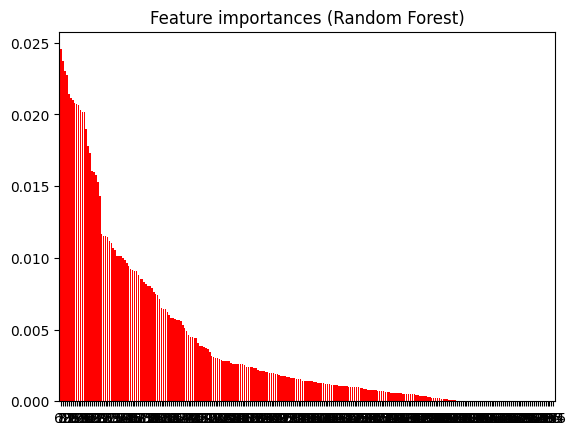

In [7]:
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train, y_train)


importances_rf = clf_rf.feature_importances_


indices_rf = np.argsort(importances_rf)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices_rf[f], importances_rf[indices_rf[f]], X.columns[indices_rf[f]]))

plt.figure()
plt.title("Feature importances (Random Forest)")
plt.bar(range(X.shape[1]), importances_rf[indices_rf],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices_rf)
plt.xlim([-1, X.shape[1]])
plt.show()

In [8]:
# Create DataFrames for feature importances
dt_feature_importances = pd.DataFrame({'Feature': indices, 'Importance_DT': importances[indices]})
rf_feature_importances = pd.DataFrame({'Feature': indices_rf, 'Importance_RF': importances_rf[indices_rf]})

# Merge DataFrames on the 'Feature' column
merged_feature_importances = pd.merge(dt_feature_importances, rf_feature_importances, on='Feature')

print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
     Feature  Importance_DT  Importance_RF
0         59       0.033418       0.020310
1         17       0.032193       0.023030
2         68       0.029951       0.023729
3         82       0.026595       0.022734
4         66       0.024349       0.017322
..       ...            ...            ...
251      215       0.000000       0.000000
252      216       0.000000       0.000000
253      217       0.000000       0.000000
254      218       0.000000       0.000000
255      255       0.000000       0.000000

[256 rows x 3 columns]


In [9]:
percentile_threshold = 0.9

importance_threshold_dt = merged_feature_importances['Importance_DT'].quantile(percentile_threshold)
importance_threshold_rf = merged_feature_importances['Importance_RF'].quantile(percentile_threshold)

print("Threshold value based on the top", int(percentile_threshold * 100), "percentileDT:", importance_threshold_dt, "percentileRF:", importance_threshold_rf)


Threshold value based on the top 90 percentileDT: 0.011042736115063564 percentileRF: 0.0111064446202185


In [10]:
merged_feature_importances = merged_feature_importances[(merged_feature_importances['Importance_DT'] > importance_threshold_dt) & (merged_feature_importances['Importance_RF'] > importance_threshold_rf)]
print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
    Feature  Importance_DT  Importance_RF
0        59       0.033418       0.020310
1        17       0.032193       0.023030
2        68       0.029951       0.023729
3        82       0.026595       0.022734
4        66       0.024349       0.017322
5        21       0.024163       0.021159
6         7       0.024021       0.024542
7        83       0.023980       0.020632
8         6       0.022955       0.020983
9        61       0.020084       0.015968
10       16       0.019476       0.020704
11       71       0.018981       0.020155
12       70       0.017888       0.019016
14       29       0.016643       0.014332
15       69       0.016138       0.016049
16       18       0.015552       0.020802
19       28       0.013293       0.015277
20       67       0.013161       0.015803
22       20       0.012280       0.020151
23       12       0.011809       0.011477
25       22       0.011323       0.011519


In [11]:
X = X.drop(X.columns.difference(X.columns[merged_feature_importances['Feature']]), axis=1)


In [12]:
len(X.columns)

21

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell building - Random forest

In [14]:
#random forest model
clf_rf = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=5, random_state=42, criterion='entropy')

clf_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy (Random Forest):", accuracy_rf)

Accuracy (Random Forest): 0.98525


In [20]:
from sklearn.ensemble import BaggingClassifier

# Define the base Random Forest classifier
base_rf = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=5, random_state=42, criterion='entropy')

# Create the BaggingClassifier
bagging_rf = BaggingClassifier(estimator=base_rf, n_estimators=10, random_state=42)

# Fit the BaggingClassifier on the training data
bagging_rf.fit(X_train, y_train)

# Predict on the test data
y_pred_bagging_rf = bagging_rf.predict(X_test)

# Calculate accuracy
accuracy_bagging_rf = accuracy_score(y_test, y_pred_bagging_rf)

print("Accuracy (Bagging Random Forest):", accuracy_bagging_rf)

Accuracy (Bagging Random Forest): 0.98525


# Test set

In [21]:
df_verseny_public_test = pd.read_csv('data/verseny_public_test.csv', sep=',', low_memory=False)

In [16]:
#prediction output like this
"""cookie_id,P1
300000,0.006936655528409391
300001,0.00527454177592661
300002,0.011525348288803432
300003,0.005810514691014177
300004,0.033702118420699805
300005,0.00527454177592661
300006,0.00527454177592661"""

X_test = df_verseny_public_test.drop(['cookie_id'], axis=1)

X_test = X_test.drop(X_test.columns.difference(X.columns), axis=1)

# target value should be a probability score between 0 and 1

y_pred_rf = clf_rf.predict_proba(X_test)[:, 1]

df_verseny_public_test['target'] = y_pred_rf

# in the csv i only need cookie id and target

df_verseny_public_test = df_verseny_public_test[['cookie_id', 'target']]

df_verseny_public_test.to_csv('data/verseny_public_test_prediction_random_forest.csv', index=False)

In [22]:
#prediction output like this
"""cookie_id,P1
300000,0.006936655528409391
300001,0.00527454177592661
300002,0.011525348288803432
300003,0.005810514691014177
300004,0.033702118420699805
300005,0.00527454177592661
300006,0.00527454177592661"""

X_test = df_verseny_public_test.drop(['cookie_id'], axis=1)

X_test = X_test.drop(X_test.columns.difference(X.columns), axis=1)

# target value should be a probability score between 0 and 1

y_pred_rf = bagging_rf.predict_proba(X_test)[:, 1]

df_verseny_public_test['target'] = y_pred_rf

# in the csv i only need cookie id and target

df_verseny_public_test = df_verseny_public_test[['cookie_id', 'target']]

df_verseny_public_test.to_csv('data/verseny_public_test_prediction_random_forest_with_bagging.csv', index=False)